# 因子检验

In [1]:
import pandas as pd
import stk_stock_pool_backtest_tool as spbt
import sys
import os
import numpy as np
try:
    sys.path.append('/home/jovyan/work') # 添加db_info.py的路径
    #sys.path.append('/home/fanyingjie/jovyan/work') 
except:
    pass
#from db_info import mysql_CH
import data_tool as dt

##########Configuration#######################
class mysql_CH_read(object):
	# 
	host = 'rdsshj1fvzlh92268305.mysql.rds.aliyuncs.com'
	user = 'erafxcdb'
	passwd = 'EraFxcdbSdfxTz'
	db = 'fxcdb'
    
class mysql_CH(object):
	# 
	host = 'rdsshj1fvzlh92268305.mysql.rds.aliyuncs.com'
	user = 'erafxcdb'
	passwd = 'EraFxcdbSdfxTz'
	db = 'fxcdb'


In [2]:
path1='/home/jovyan/work/'
os.chdir(path1)
cfg = spbt.stockpool_db_request(mysql_CH=mysql_CH).cfg
dataSource = dt.DataApi(cfg)
AdDay=pd.read_csv('adjustDay.csv',engine='python',skipfooter=3)           
DayList=np.array(AdDay['Start']).astype(str)
dayList=DayList[37:len(DayList)-1]
print(dayList)

#获取因子数据（字典形式）
'''
FD = {}
date=['20160108','20160111','20160112']
df1 = pd.DataFrame({'symbol':['000001','000005','000006','000007','000008'],'value':[0.1,0.3,0.5,0.9,0.1],'z_score':[0.1,0.2,0.4,0.3,0.9]})
df2 = pd.DataFrame({'symbol':['000001','000005','000006','000007','000008'],'value':[0.1,0.3,0.4,0.3,0.3],'z_score':[0.1,0.1,0.5,0.2,0.7]})
df3 = pd.DataFrame({'symbol':['000001','000005','000006','000007','000008'],'value':[0.1,0.2,0.6,0.8,0.1],'z_score':[0.1,0.2,0.6,0.1,0.8]})
FD[date[0]] = df1
FD[date[1]] = df2
FD[date[2]] = df3
FD
'''

FD = {}
path2='/home/jovyan/work/backtest_dnn/21 factor test/'
os.chdir(path2)
name=['tdate','symbol','Return','proba1','proba0']
for tdate in dayList:
    data=pd.read_csv(path2+'long_cnn '+ str(tdate) +'.csv')
    data=data.rename(columns={'Date': 'tdate','Symbol':'symbol'})
    FDdata=data[name]
    FDdata.symbol=[str(x).zfill(6) for x in FDdata.symbol]
    FD[tdate] = FDdata

['20110114' '20110218' '20110318' '20110419' '20110518' '20110616'
 '20110714' '20110811' '20110908' '20111014' '20111111' '20111209'
 '20120110' '20120214' '20120313' '20120413' '20120515' '20120612'
 '20120711' '20120808' '20120905' '20121010' '20121107' '20121205'
 '20130107' '20130204' '20130311' '20130410' '20130513' '20130613'
 '20130711' '20130808' '20130905' '20131014' '20131111' '20131209'
 '20140107' '20140211' '20140311' '20140409' '20140509' '20140609'
 '20140707' '20140804' '20140901' '20140930' '20141104' '20141202'
 '20141230' '20150129' '20150305' '20150402' '20150504' '20150601'
 '20150630' '20150728' '20150825']


In [3]:
print(FD)

{'20121010':          tdate  symbol    Return    proba1    proba0
0     20121010  000001  0.027155  0.484190  0.515810
1     20121010  000002  0.017944  0.489919  0.510081
2     20121010  000004 -0.025887  0.497929  0.502071
3     20121010  000005 -0.003400  0.479227  0.520773
4     20121010  000006  0.054322  0.550974  0.449026
5     20121010  000007 -0.099412  0.485518  0.514482
6     20121010  000008  0.019158  0.601076  0.398924
7     20121010  000009 -0.008638  0.437820  0.562180
8     20121010  000010 -0.049412  0.558559  0.441441
9     20121010  000011  0.022121  0.467283  0.532717
10    20121010  000012  0.028884  0.408058  0.591942
11    20121010  000014 -0.066592  0.463402  0.536598
12    20121010  000016 -0.021407  0.539493  0.460507
13    20121010  000017  0.319442  0.474841  0.525159
14    20121010  000018  0.071969  0.440021  0.559979
15    20121010  000019 -0.046932  0.550168  0.449832
16    20121010  000020 -0.031962  0.482705  0.517295
17    20121010  000021 -0.059054 

In [4]:
print(dayList)

['20110114' '20110218' '20110318' '20110419' '20110518' '20110616'
 '20110714' '20110811' '20110908' '20111014' '20111111' '20111209'
 '20120110' '20120214' '20120313' '20120413' '20120515' '20120612'
 '20120711' '20120808' '20120905' '20121010' '20121107' '20121205'
 '20130107' '20130204' '20130311' '20130410' '20130513' '20130613'
 '20130711' '20130808' '20130905' '20131014' '20131111' '20131209'
 '20140107' '20140211' '20140311' '20140409' '20140509' '20140609'
 '20140707' '20140804' '20140901' '20140930' '20141104' '20141202'
 '20141230' '20150129' '20150305' '20150402' '20150504' '20150601'
 '20150630' '20150728' '20150825']


In [5]:
#因子检验配置文件
pool_cfg = {}
pool_cfg['beginDate'] = '20110115' #开始时间要滞后一天
pool_cfg['endDate'] = '20150825'
pool_cfg['freq'] = 20
pool_cfg['FactorID'] = 'TTest'
pool_cfg['Method'] = 'proba1'
pool_cfg['groupNum'] = 5
pool_cfg['FactorData'] = FD
pool_cfg['stockpool_info'] = spbt.stockpool_db_request(mysql_CH=mysql_CH)
pool_cfg['backtestfast_info'] = spbt.backtestfast_db_request(mysql_CH=mysql_CH)

path3='/home/jovyan/work/backtest_dnn/21 factor test/'
os.chdir(path3)
#报告保存的地方
#save_cfg = {'path_to_save_report':'/home/jovyan/work/data'}
save_cfg = {'path_to_save_report': path3}

In [6]:
test = spbt.factorTest(save_cfg=save_cfg,pool_cfg=pool_cfg)
test.run()

working on group ( 1 / 5 )
working on group ( 2 / 5 )
working on group ( 3 / 5 )
working on group ( 4 / 5 )
working on group ( 5 / 5 )


              ic
count  56.000000
mean    0.109751
std     0.137137
min    -0.235290
25%     0.024379
50%     0.095284
75%     0.201897
max     0.361180


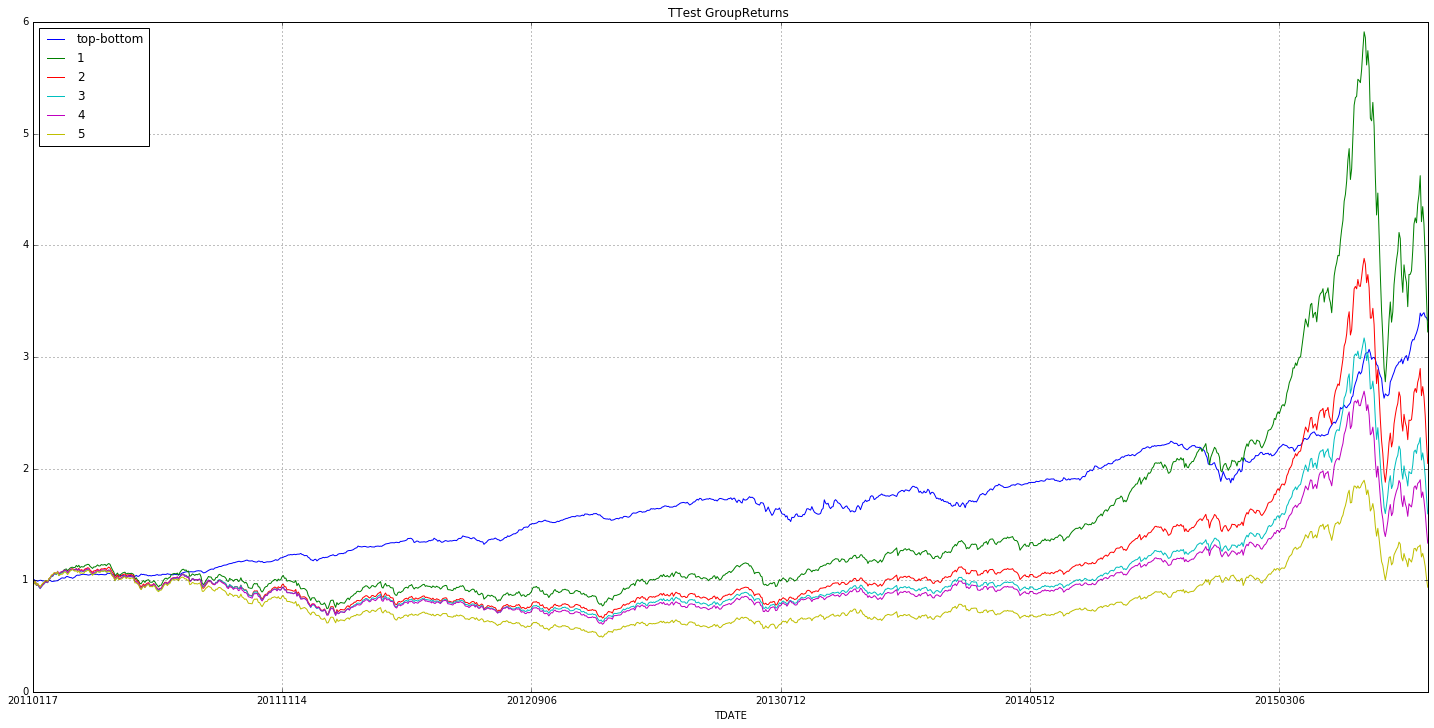

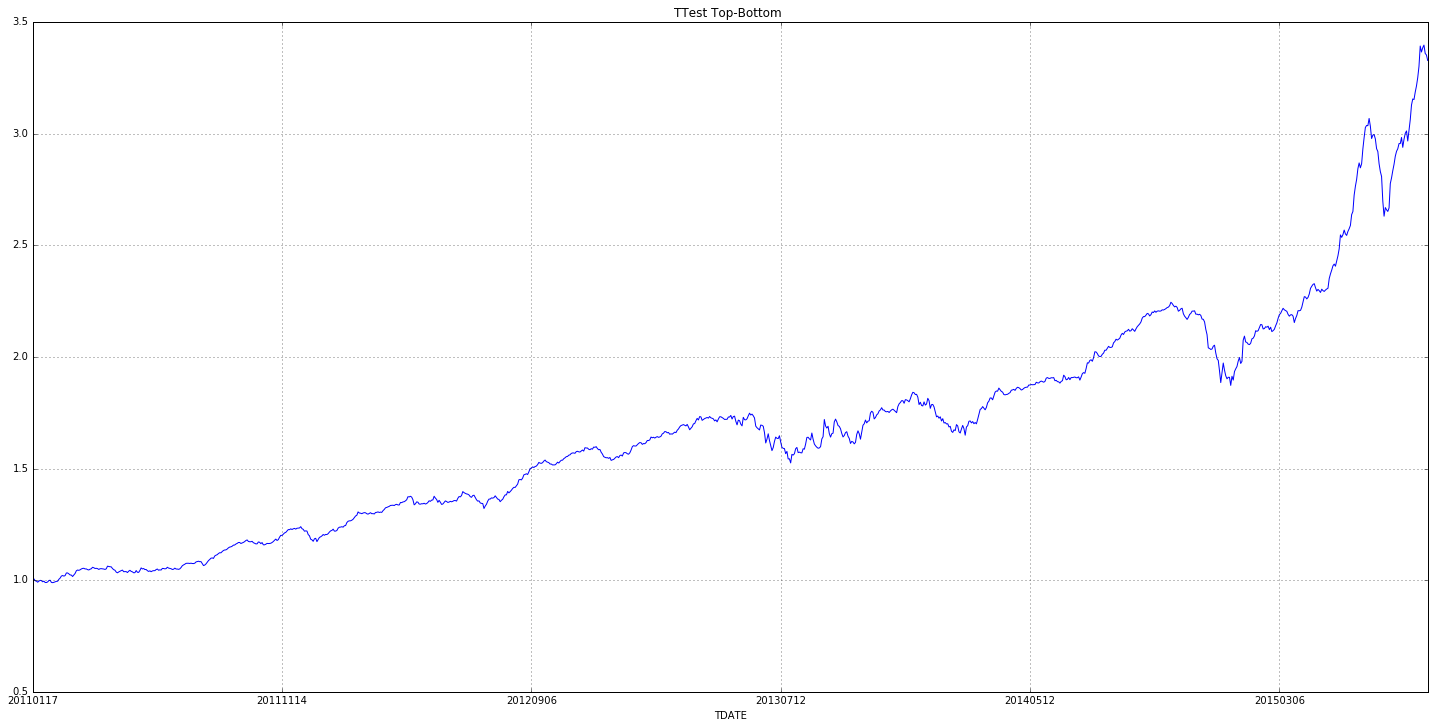

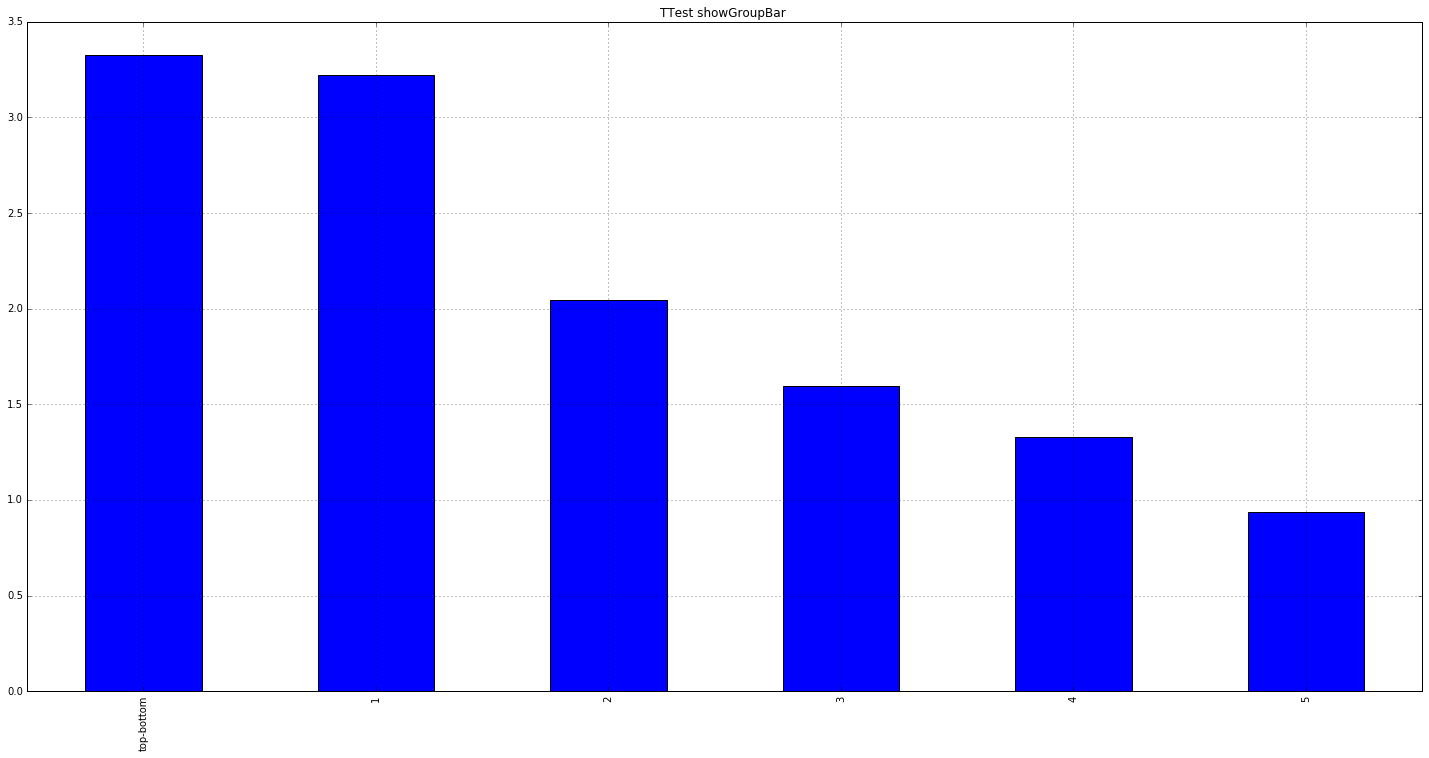

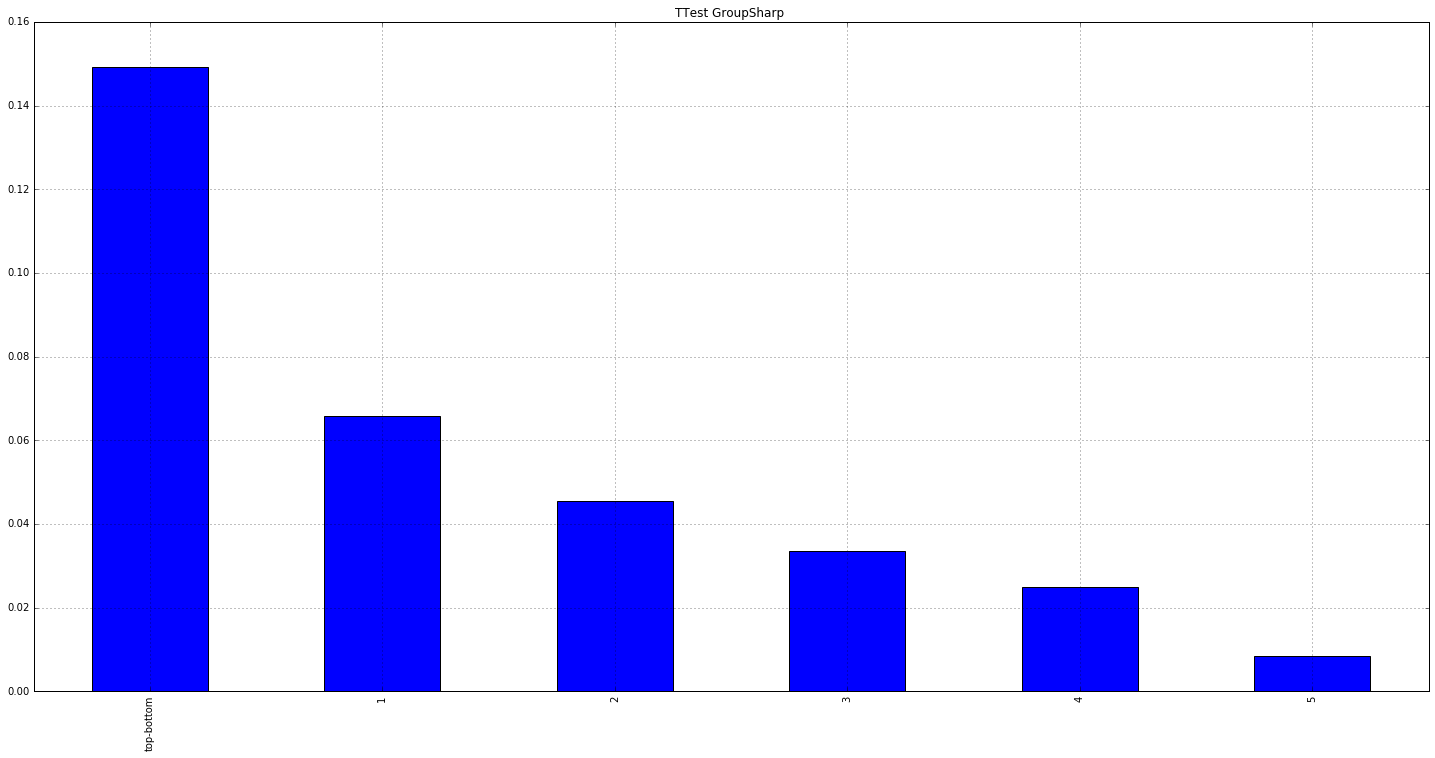

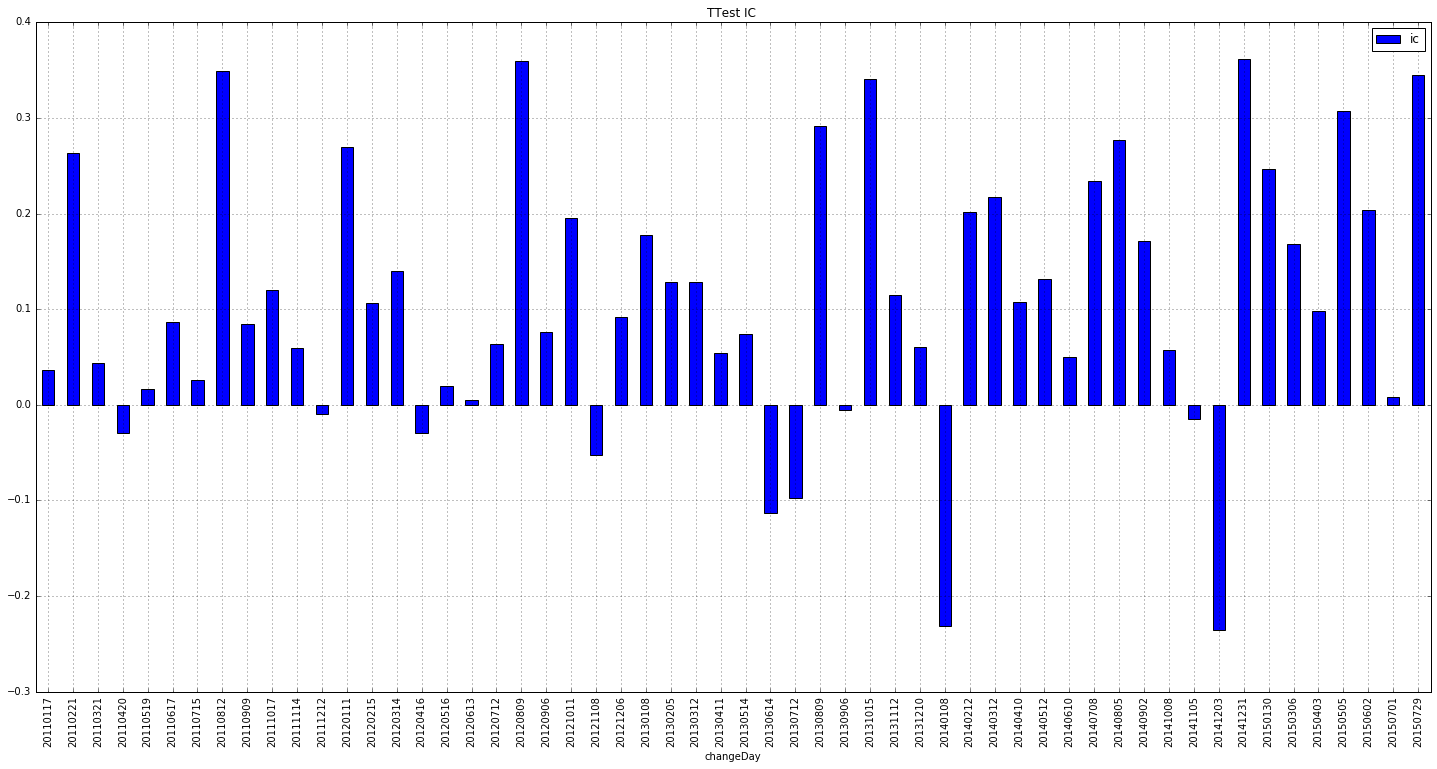

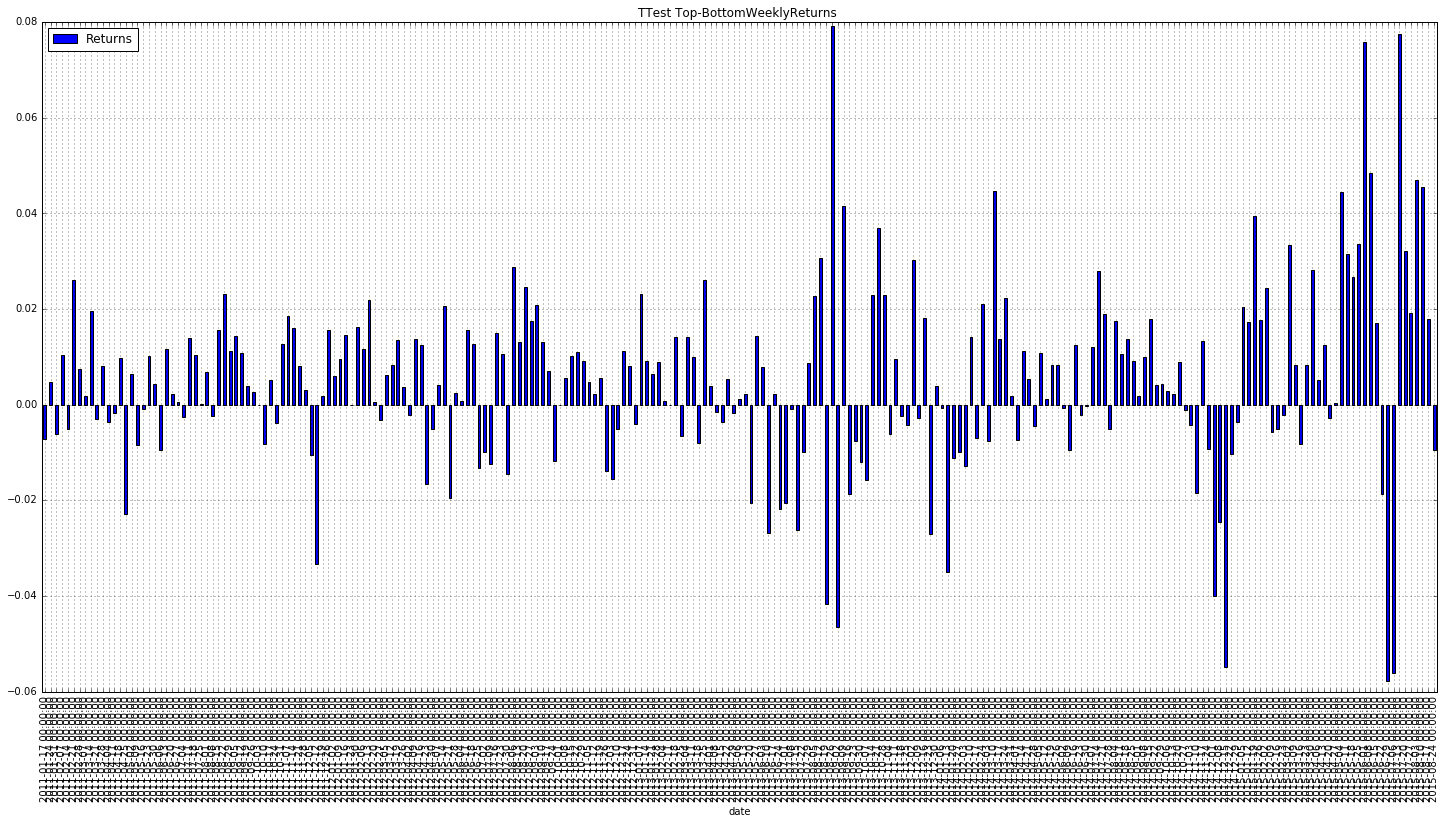

In [ ]:
report = spbt.GetReport(save_cfg=save_cfg,report_cfg=pool_cfg)
report.run()